# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head(5)) # Вывод на экран первых пяти строк
data.info() # Проверка на соответствие типов данных
print('--------------------------------------------------------')
print(data.isnull().sum()) # Количество пропусков в таблице
print('--------------------------------------------------------')
display(data[data.duplicated()]) # Нахождение дубликатов
display(data.columns) # Проверка названий столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

1. Типы данных: Дата в данных имеет тип object -> Привести у нормальному виду, is_appartment имеет тип данных object, a должен быть bool;
2. Пропуски: Такие столбцы, как ceiling_height, floors_total, living_area, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest для того чтобы не исказить данные можно заменить средним значением или медианой. Пропуски в столбцах с типом данных bool (is_apartment) необходимо заменить на значение False. В столбце balcony отсутствующие значения скорее всего говорят об отсутствии балкона значит их можно заменить на 0. Столбец locality_name скорее всего относится к случайному пропуску поэтому его можно будет заменить на пустое значение. days_exposition отсутствие данных возможно из-за того что данный сервис использовался для уже договоренной продажи, которая не нуждалась в объявлении, рассмотрим этот случай далее более подробно 
3. Дубликаты: Дубликаты отсутствуют;
4. Имена столбцов: Имена соответствуют завленным, пропуски и лишние пробелы отсутствуют.

### Шаг 2. Предобработка данных

In [2]:
pd.options.mode.chained_assignment = None # Отключение предупреждения

# Приводим дату к нормальному виду дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

# Приводим к верному типу данных is_apartment
data['is_apartment'] = data['is_apartment'].fillna(value = 'False').astype('bool')

print(data.isnull().sum())

# Работаем с пропусками в количественных переменных. Заменим пропуски медианой, т.к. она более устойчива к выбросам

data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(value = data['floors_total'].median())
data['floors_total'] = data['floors_total'].fillna(value = data['floors_total'].median())
data['living_area'] = data['living_area'].fillna(value = data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(value = data['kitchen_area'].median())
data['balcony'] = data['balcony'].fillna(value = 0)
data['airports_nearest'] = data['airports_nearest'].fillna(value = data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value = data['cityCenters_nearest'].median())

# Сначала заменим все значения расстояния у парков которых нет на 0 и сами значения парков на 0, оставшиеся пустые значения
# заменим на медиану
data['ponds_nearest'][data['ponds_around3000'].isnull() & data['ponds_nearest'].isnull()] = 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value = data['ponds_nearest'].median())

# Проделаем тоже самое для водоемов
data['parks_nearest'][data['parks_around3000'].isnull() & data['parks_nearest'].isnull()] = 0
data['parks_around3000'] = data['parks_around3000'].fillna(value = 0)
data['parks_nearest'] = data['parks_nearest'].fillna(value = data['parks_nearest'].median())

# Заменим locality_name на пустые значения, как признак того, что данные отсутствуют

data['locality_name'] = data['locality_name'].fillna(value = ' ')

# Заменим данные столбцов в которых только целые числа на тип int, для удобства

data['floors_total'] = data['floors_total'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

display(data.head(5))
print(data.info())
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0,209.0,0,243.5,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_aroun

Вывод: Данные приведены к нормальному виду, обработаны все пропуски кроме столбца days_exposition рассмотрим его позже, также в некоторых столбцах был изменен тип данных

Начнем описание с последнего элемента. Количество дней продажи может отсутствовать по причине того, что с этой недвижимостью были проведены другие операции (не продажа) такое может быть если база данных для хранения информации не как не делится на таблицы по категориям совершенной операции над недвижимостью, с парками и водоёмами все просто, они могут отсутствовать по причине того что их просто нет по близости, т.е количество и расстояние равны 0, но были также встречены данные, где указано количество водоемов или парков но не указано расстояние до них, это может говорить о том что они находятся очень и очень близко. Пропуски в данных с названием места продажи могут быть связаны с тем, что просто кто-то забыл внести данные т.к таких значений всего лишь 49. Пропуски в столбце balcony просто говорят об отсутствии балкона т.е нулевом значении. kitchen_area отсутствует скорее всего в квартирах студиях где жил. площадь считается общей. living_area с отсутствующими значениями скорее всего относится к такой недвижимости, как гараж и т.д. floors_total это пропуски относящиеся к случайным кто-то просто забыл внести данные, ceiling_height с пропусками я предположу, что это земельные участки. Если я не прав наведи на правильную мысль пжлст)

Хорошо, я буду иметь ввиду это, я старался все наиболее важные и не явные пропуски считать в процентном соотнешении, буду проверять лучше

# Автоматизация построения графиков путём создания доп. ф-ии

# Проверка на выбросы

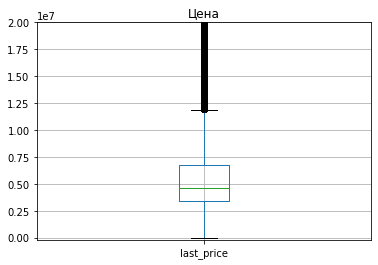

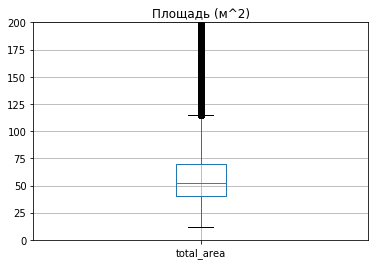

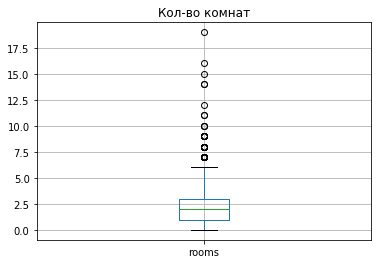

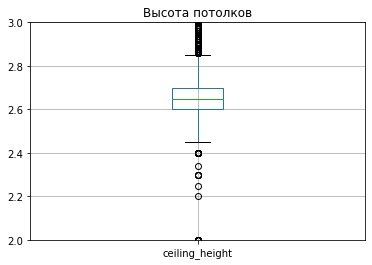

0.07861
0.05992
0.35609
0.12


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0,209.0,0,243.5,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,9.1,0.0,городской посёлок Янино-1,26726.0,13098.5,0,0.0,0,0.0,55.0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,True,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0,209.0,0,243.5,155.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0,209.0,0,243.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.65,5,17.5,4,True,...,6.0,0.0,Тихвин,26726.0,13098.5,0,0.0,0,0.0,413.0
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9,40.0,8,True,...,8.0,0.0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0
23695,14,3100000.0,59.0,2018-01-15,3,2.65,5,38.0,4,True,...,8.5,0.0,Тосно,26726.0,13098.5,0,0.0,0,0.0,45.0
23696,18,2500000.0,56.7,2018-02-11,2,2.65,3,29.7,1,True,...,9.1,0.0,село Рождествено,26726.0,13098.5,0,0.0,0,0.0,NaN


In [3]:
# Сделаем проверку на выбросы в числовых столбцах, для того чтобы правильно преобразовать данные и исключить слишком большие значения

plt.ylim(-200000,20000000)
data.boxplot('last_price').set_title('Цена')
plt.show()

plt.ylim(0,200)
data.boxplot('total_area').set_title('Площадь (м^2)')
plt.show()

data.boxplot('rooms').set_title('Кол-во комнат')
plt.show()

plt.ylim(2,3)
data.boxplot('ceiling_height').set_title('Высота потолков')
plt.show()

# Исходя из графиков, мы понимаем что есть запредельно высокие цены, общая площадь в 110 м^2 уже является очень большой,
# Шесть комнат, это практически целый этаж, что в теории возможно, ну и наконец высота потолков колеблется в пределах от:
# 2.4 - 2.8 м^2 рассчитаем процент таких квартир и посмотрим какой процент они составляют от общего количества, чтобы принять
# решении о их срезе из данных

print(round(len(data.query('last_price >= 12500000')) / len(data),5))
print(round(len(data.query('total_area >= 110')) / len(data),5))
print(round(len(data.query('rooms >= 6 or rooms <= 1')) / len(data),5))
print(round(len(data.query('ceiling_height >= 2.9 or ceiling_height <= 2.4')) / len(data),2))

# Исходя из полученных данных процент квартир с выбросами достаточно низкий сделаем срез по полученным условиям

data = data.query('last_price < 12500000 and total_area <= 110 and rooms <= 6 and rooms >= 1 and ceiling_height <= 2.9 and ceiling_height >= 2.4')

display(data)

In [4]:
# Посмотрим сколько осталось квартир c пустыми значениями в days_exposition
display(data['days_exposition'].isnull().sum())

# Рассчитаем процент таких квартир
print(data['days_exposition'].isnull().count() / len(data))

# C учетом того, что после среза выбросов, данные с неизвестным количеством дней размещения составляют 1% можно так же их срезать
# ведь мы рассматриваем именно продаваемую недвижимость, а эти данные имеют неизвестное происхождение

data.dropna(subset = ['days_exposition'], inplace = True)
display(data)

2290

1.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0,209.0,0,243.5,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,9.10,0.0,городской посёлок Янино-1,26726.0,13098.5,0,0.0,0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0,209.0,0,243.5,155.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,8.81,0.0,посёлок Мурино,26726.0,13098.5,0,0.0,0,0.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.00,2,True,...,6.00,0.0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,243.5,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,True,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0,209.0,1,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.50,4,True,...,6.00,0.0,Тихвин,26726.0,13098.5,0,0.0,0,0.0,413.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,True,...,8.00,0.0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0


Вывод: С помощью ящика с усами полностью избавились от выбросов, что значительно поможет при построении графиков и т.д в дальнейшей работе

### Шаг 3. Посчитайте и добавьте в таблицу

In [5]:
data['price_sqr_metr'] = round(data['last_price'] / data['total_area'], 2)

# День, месяц, год

data['day'] =  data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Проведем категоризацию по этажам

def value_floors(data_local):
    if data_local['floor'] == 1:
        return 'первый'
    elif data_local['floor'] == data_local['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['category_floor'] = data.apply(value_floors, axis = 1)

# Добавим столбцы с соотношением жилой и общей площади, а также отношение площади кухни к общей

data['ratio_living_total'] = data['living_area'] / data['total_area']
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']

display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqr_metr,day,month,year,category_floor,ratio_living_total,ratio_kitchen_total
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0,243.5,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,0,0.0,55.0,95065.79,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0,243.5,155.0,99195.71,3,11,2017,другой,0.284182,0.386059
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,0,0.0,189.0,87454.76,2,5,2018,другой,0.465320,0.265682


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

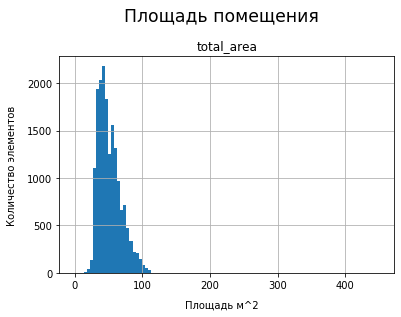

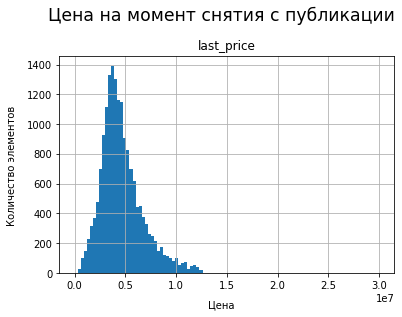

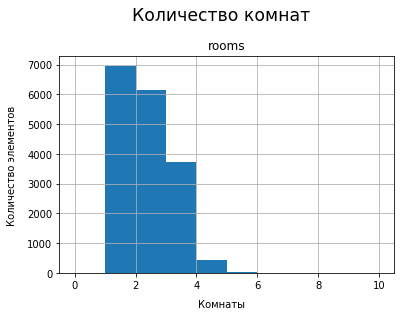

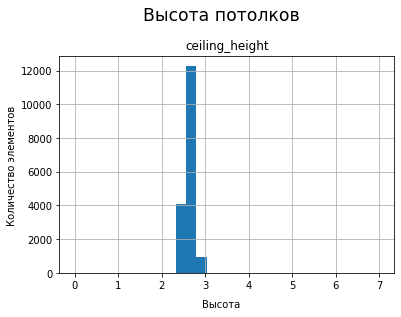

In [6]:
# Графики версия 2

def hist_plot_labels(df, row: list, title :list, x: list, y: str, *param_plot):
    
    for i in range(len(row)):
        fig, axes = plt.subplots(sharex=True, sharey=True)

        df.hist(row[i], **param_plot[i], ax=axes)

        plt.suptitle(title[i], x=0.5, y=1.05, ha='center', fontsize='xx-large')
        fig.text(0.5, 0.004, x[i], ha='center')
        fig.text(0.004, 0.5, y, va='center', rotation='vertical')
    
    
(hist_plot_labels(
    data,
    
    ['total_area', 'last_price', 'rooms', 'ceiling_height'],
    ['Площадь помещения', 'Цена на момент снятия с публикации', 'Количество комнат', 'Высота потолков'],
    ['Площадь м^2', 'Цена', 'Комнаты', 'Высота'],
    
    'Количество элементов',
    
    {'bins':100, 'range':(0, 450)},{'bins':100, 'range': (0, 30000000)},
    {'bins': 10, 'range': (0,10)},{'bins':30, 'range': (0, 7)}
) 
)


Вывод: Для того чтобы проверить адекватность построенных графиков нужно проверить адекватность того что они показывают,
начнем с первого. 

1. Наибольшее количество квартир (почти 2000) с площадью 50 кв. м., это достаточно правдоподобно. Квартиры с площадью более 100 кв. м. встречаются очень редко, как и квартиры с площадью менее 30 кв. м.;

2. Больше всего квартир (почти 1400) с стоимостью около 4 млн. рублей, тоже достаточно правдоподобно, меньше всего квартир с стоимостью более 10 млн. рублей, и до 2 млн. рублей (а жаль...);

3. Больше всего однакомнатных квартир, и далее по убыванию. Есть 6 комнатные... но это наверное целый этаж;

4. Больше всего потолков в районе от 2.3 - 2.7 метра, в принципе обычные потолки, остальных потолков гораздо меньше, что является признаком правильного построения гистограмм.

# Изучение времени продажи квартир

count    17311.000000
mean       168.790191
std        206.450836
min          1.000000
25%         43.000000
50%         90.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64

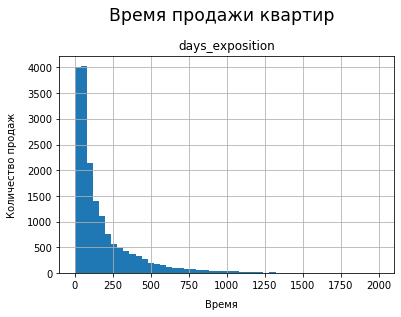

In [7]:
#data.hist('days_exposition', bins = 50, range = (0, 2000)) это было до


(hist_plot_labels(
    data,
    ['days_exposition'], 
    ['Время продажи квартир'], 
    ['Время'], 
    'Количество продаж', 
    {'bins':50, 'range':(0, 2000)})
)
data['days_exposition'].describe()

Вывод: Медиана почти в два раза отличается от среднего значения, это может быть из-за того, что слишком долгие продажи сильно влияют на нее необходимо определить, диапозон долгих продаж построим ящик с усами.

0.8948067702616833


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqr_metr,day,month,year,category_floor,ratio_living_total,ratio_kitchen_total
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0,243.5,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,0,0.0,55.0,95065.79,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0,243.5,155.0,99195.71,3,11,2017,другой,0.284182,0.386059
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,0,0.0,189.0,87454.76,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0,243.5,289.0,88524.59,6,2,2017,другой,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.30,4,True,...,2,652.0,29.0,100566.57,2,2,2018,другой,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.00,2,True,...,0,243.5,15.0,105769.23,3,7,2018,другой,0.596154,0.115385
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.50,4,True,...,0,0.0,413.0,45000.00,4,7,2017,другой,0.583333,0.200000
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,True,...,1,675.0,239.0,73717.95,4,8,2016,другой,0.641026,0.128205


count    15490.000000
mean       110.997611
std        100.540023
min          1.000000
25%         37.000000
50%         74.000000
75%        160.000000
max        419.000000
Name: days_exposition, dtype: float64

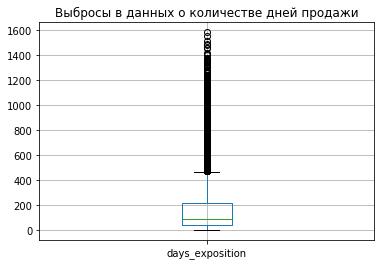

In [8]:
data.boxplot('days_exposition').set_title('Выбросы в данных о количестве дней продажи')
print(len(data.query('days_exposition < 420')) / len(data)) # Процент таких продаж
data = data.query('days_exposition < 420')
display(data)
data['days_exposition'].describe()

Вывод: Мы отбросили слишком большие значения, значения которые больше 420 дней, тем самым приблизили среднее значение к медианному, из метода discribe видно, что 25% значений равны 37, можем установить это в качестве порога для определения быстрых продаж 

# Зависимости в графиках

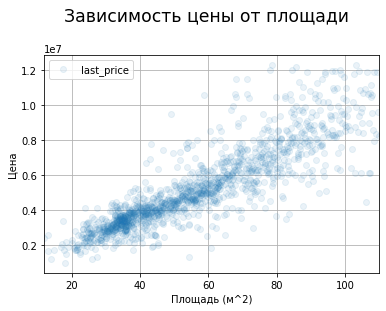

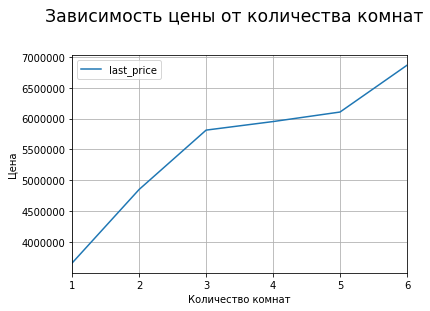

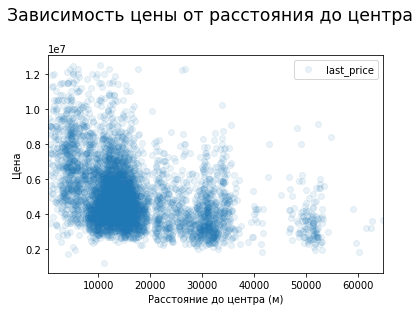

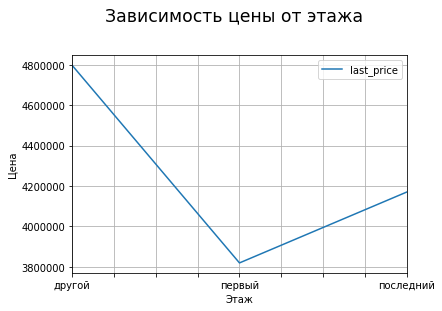

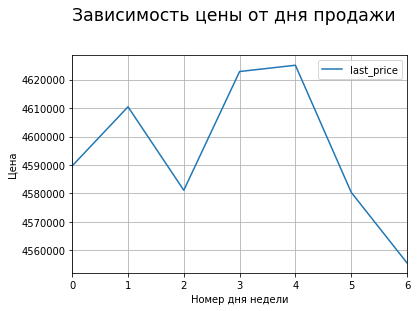

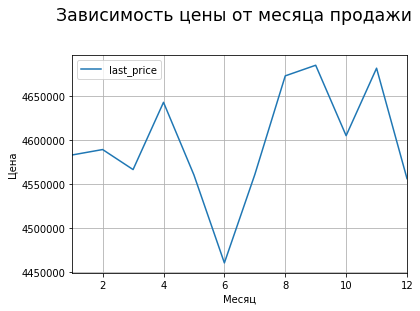

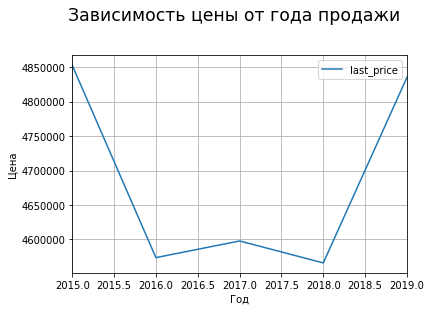

In [9]:
def plot_pivot_table(df, list_index: list, param_value, x_y_title: list, *plot_param: dict):
    
    for i in range(len(list_index)):
        
        fig, axes = plt.subplots(sharex=True, sharey=True)

        df.pivot_table(index = list_index[i], values = param_value).plot(**plot_param[i], ax=axes)

        plt.suptitle(x_y_title[i][2], x=0.5, y=1.05, ha='center', fontsize='xx-large')
        axes.set_xlabel(x_y_title[i][0])
        axes.set_ylabel(x_y_title[i][1])


        
(plot_pivot_table(
    data,
    ['total_area', 'rooms', 'cityCenters_nearest', 'category_floor', 'day', 'month', 'year'],
    
    'last_price', 
    
    [['Площадь (м^2)', 'Цена', 'Зависимость цены от площади'],
     ['Количество комнат', 'Цена', 'Зависимость цены от количества комнат'],
     ['Расстояние до центра (м)', 'Цена', 'Зависимость цены от расстояния до центра'],
     ['Этаж', 'Цена', 'Зависимость цены от этажа'],
     ['Номер дня недели', 'Цена', 'Зависимость цены от дня продажи'],
     ['Месяц', 'Цена', 'Зависимость цены от месяца продажи'],
     ['Год', 'Цена', 'Зависимость цены от года продажи']],
    
    
    {'style':'o', 'alpha':0.09, 'grid':True},{'grid':True},{'style':'o', 'alpha':0.09},
    {'grid':True},{'grid':True},{'grid':True},{'grid':True}
)
)
    

Вывод: Чем больше площадь, тем больше цена, чем больше комнат, тем больше цена, чем ближе к центру, тем выше цена, но мы видим что большинство недвижимости расположилось в районе от 10 до 20 км, первый и последний этаж дешевле чем другие. Ввыходные недвижимость дешевле, пик цен приходится на 4,8,9,11 месяцы, самая дешевая недвижимость была с 2016 по 2018 год.

# Центр, это где?

In [10]:
top10_loc_name = data.pivot_table(index = 'locality_name', values = 'days_exposition', aggfunc = 'count')
top10_loc_name = top10_loc_name.sort_values(by = 'days_exposition', ascending = False).head(10)
cost_sqr = data.pivot_table(index = 'locality_name', values = 'price_sqr_metr')

cost_sqr_top10 = top10_loc_name.join(cost_sqr)

print(cost_sqr_top10)

                   days_exposition  price_sqr_metr
locality_name                                     
Санкт-Петербург               9738   103910.594640
посёлок Мурино                 444    85399.472973
посёлок Шушары                 364    77743.263626
Всеволожск                     279    66852.655699
посёлок Парголово              271    89304.280775
Колпино                        270    74633.727556
деревня Кудрово                246    92451.184959
Пушкин                         232    99026.541853
Гатчина                        220    67973.821864
Выборг                         168    57043.635060


Text(0, 0.5, 'Цена')

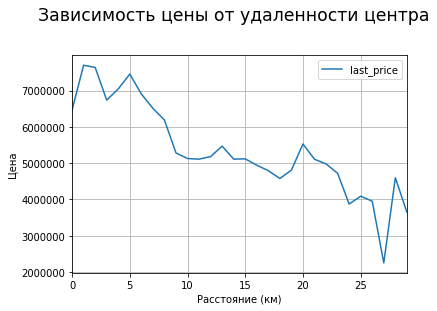

In [11]:
saint_pet_data = data.query('locality_name == "Санкт-Петербург"').reset_index()
saint_pet_data['cityCenters_nearest_km'] = round(saint_pet_data['cityCenters_nearest'] / 1000, 0)

fig, axes = plt.subplots(sharex=True, sharey=True)

saint_pet_data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price').plot(grid = True, ax = axes)

plt.suptitle('Зависимость цены от удаленности центра', x=0.5, y=1.05, ha='center', fontsize='xx-large')
        
axes.set_xlabel('Расстояние (км)')
axes.set_ylabel('Цена')


Вывод: Из графика видно, что резкое падение цен наблюдается в радиусе 8 км, т.е квартиры, которые находятся от центра в радиусе 8 км считаются квартирами находящимися в центре

# Квартиры Санкт-Петербурга

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,price_sqr_metr,day,month,year,category_floor,ratio_living_total,ratio_kitchen_total,cityCenters_nearest_km
5,24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,...,124.0,265.0,66872.43,5,10,2015,первый,0.478395,0.201646,2.0
23,70,9,3400000.0,30.0,2018-09-05,1,2.65,5,16.0,1,...,243.5,14.0,113333.33,2,9,2018,первый,0.533333,0.233333,8.0
28,94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.6,2,...,243.5,4.0,118644.07,4,4,2019,другой,0.528814,0.186441,7.0
31,99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.0,2,...,243.5,104.0,106666.67,1,9,2017,другой,0.744444,0.088889,3.0
37,111,4,4590000.0,40.0,2017-05-29,1,2.65,6,18.0,1,...,243.5,31.0,114750.00,0,5,2017,первый,0.450000,0.250000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,23632,20,5000000.0,38.0,2018-06-23,1,2.55,16,30.0,15,...,230.0,113.0,131578.95,5,6,2018,другой,0.789474,0.239474,7.0
9720,23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,...,171.0,166.0,79840.00,3,4,2018,последний,0.516800,0.193600,4.0
9729,23665,11,4250000.0,47.0,2016-05-20,1,2.65,6,18.2,1,...,519.0,131.0,90425.53,4,5,2016,первый,0.387234,0.310638,5.0
9733,23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.0,2,...,660.0,80.0,122093.02,4,5,2018,другой,0.674419,0.139535,7.0


0.723496215026814
0.4176090422329579
-0.16445888672876707


"saint_pet_data.pivot_table(index = 'total_area', values = 'last_price').plot(style = 'o', alpha=0.2)\nsaint_pet_data.pivot_table(index = 'rooms', values = 'last_price').plot(grid = True)\nsaint_pet_data.pivot_table(index = 'category_floor', values = 'last_price').plot(grid = True)\n# Работа с датой. Построение зависимостей \nsaint_pet_data.pivot_table(index = 'day', values = 'last_price').plot(grid = True)\nsaint_pet_data.pivot_table(index = 'month', values = 'last_price').plot(grid = True)\nsaint_pet_data.pivot_table(index = 'year', values = 'last_price').plot(grid = True)"

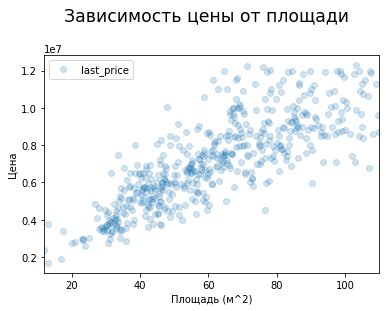

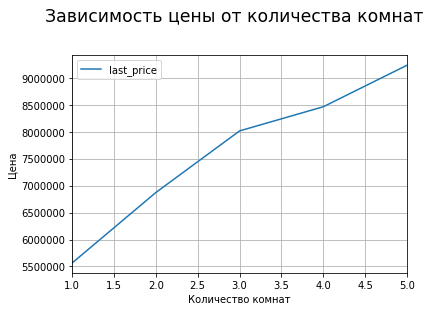

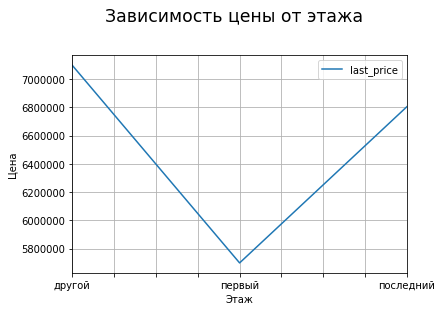

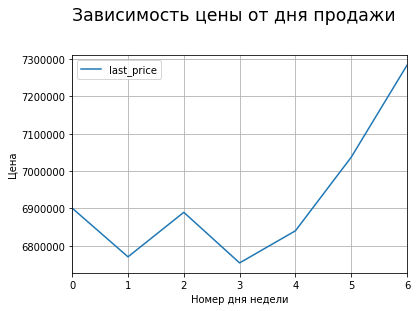

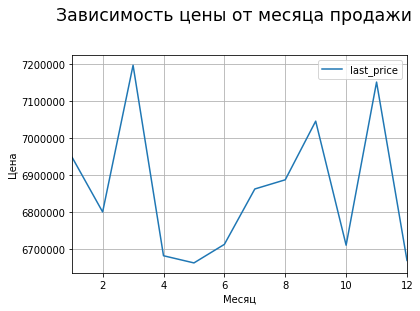

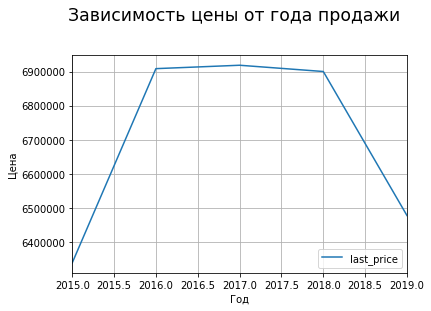

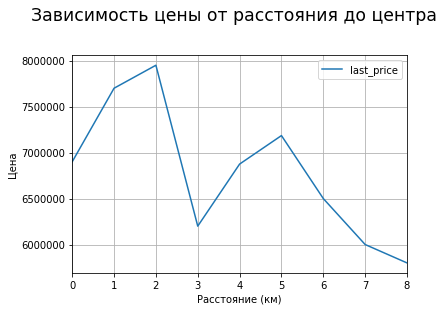

In [12]:
saint_pet_data = saint_pet_data.query('cityCenters_nearest_km <= 8')
display(saint_pet_data)
print(saint_pet_data['total_area'].corr(saint_pet_data['last_price']))
print(saint_pet_data['rooms'].corr(saint_pet_data['last_price']))
print(saint_pet_data['cityCenters_nearest_km'].corr(saint_pet_data['last_price']))


(plot_pivot_table(
    saint_pet_data,
    
    ['total_area', 'rooms', 'category_floor', 'day', 'month', 'year'],
    
    'last_price', 
    
    [['Площадь (м^2)', 'Цена', 'Зависимость цены от площади'],
     ['Количество комнат', 'Цена', 'Зависимость цены от количества комнат'],
     ['Этаж', 'Цена', 'Зависимость цены от этажа'],
     ['Номер дня недели', 'Цена', 'Зависимость цены от дня продажи'],
     ['Месяц', 'Цена', 'Зависимость цены от месяца продажи'],
     ['Год', 'Цена', 'Зависимость цены от года продажи']
    ],
    
    {'style':'o', 'alpha':0.2},{'grid':True},
    {'grid':True},{'grid':True},{'grid':True},{'grid':True}
)
)


fig, axes = plt.subplots(sharex=True, sharey=True)

saint_pet_data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median').plot(grid = True, ax = axes)

plt.suptitle('Зависимость цены от расстояния до центра', x=0.5, y=1.05, ha='center', fontsize='xx-large')
        
axes.set_xlabel('Расстояние (км)')
axes.set_ylabel('Цена')


# То что было
'''saint_pet_data.pivot_table(index = 'total_area', values = 'last_price').plot(style = 'o', alpha=0.2)
saint_pet_data.pivot_table(index = 'rooms', values = 'last_price').plot(grid = True)
saint_pet_data.pivot_table(index = 'category_floor', values = 'last_price').plot(grid = True)
# Работа с датой. Построение зависимостей 
saint_pet_data.pivot_table(index = 'day', values = 'last_price').plot(grid = True)
saint_pet_data.pivot_table(index = 'month', values = 'last_price').plot(grid = True)
saint_pet_data.pivot_table(index = 'year', values = 'last_price').plot(grid = True)'''

Вывод: Цены также как и в других регионах растут пропорционально квадратуре помещения, цена также растет с числом комнат, самые дорогие квартиры квартиры в 2 км от центра, затем от 5 км и почему-то мы видим что в пограничной зоне существует резкое удешевление (3 км), цена квартир последнего этажа и всех остальных этажей кроме первого не имеют силиного отличия, как в других регионах, ситуация с днем продажи координально другая цены на квартиры начинают расти к выходным, пиком цены становятся месяцы 3,9,11, а самые дорогие квартиры это квартиры продаваемые с 2015-2018

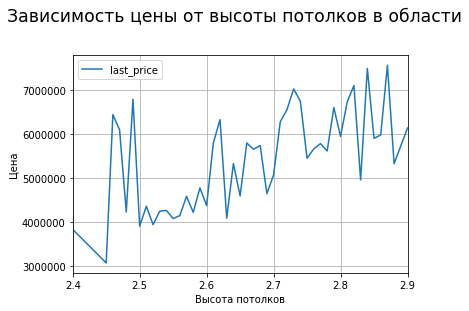

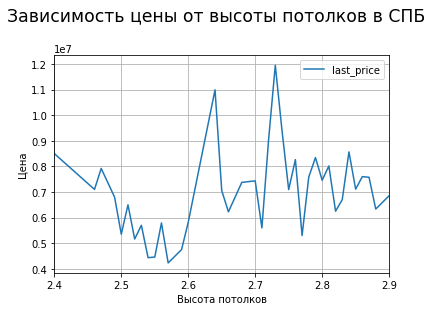

In [13]:
(plot_pivot_table(
    data,
    ['ceiling_height'],
    'last_price', 
    [['Высота потолков', 'Цена', 'Зависимость цены от высоты потолков в области']],
    {'grid':True}
)
)

(plot_pivot_table(
    saint_pet_data,
    ['ceiling_height'],
    'last_price', 
    [['Высота потолков', 'Цена', 'Зависимость цены от высоты потолков в СПБ']],
    {'grid':True}
)
)

В СПБ как и в области можно заметить, что большинство квартир имеют квадратуру от 30 до 60 кв.м., цена в области ниже чем в СПБ, об этом нам говорит ось Y причем по всем параметрам, распределения с числом комнат в принципе достаточно похожи за исключением цены. В области в отличии от СПБ если посмотреть на график с ростом потолков растут и цены, в СПБ лишь за исключением стандартных размеров потолков (2.65, 2.75) видны скачки цены, а в остальном диапазоне сильных скачков не наблюдается, до 2.6 метров идет даже значительное удешевление квартиры.

### Шаг 5. Общий вывод

В ходе выполнения проекта:

1. Было проведено исследование представленных данных, найдены и заменены все пропуски в данных в соотвествие с логикой, также некоторые столбцы приведены к правильному типу данных. Большинство пропусков в количественных переменных были заменены на медианное значение т.к такие значения более устойчивы к выбросам, остальные пропуски заменены либо на 0 (как признак отсутствия) либо на пустые значения в категориальных переменных, либо на False в столбцах с типом данных bool.

2. Выявлены все выбросы и к ним применен срез. Интересными выбросами являются запредельно высокие цены на недвижимость, очень высокие или наоборот низкие потолки, отсутствие комнат или наоборот их большое количество, огромная площадь, которая не подвергается здравому смыслу.

3. После удаления всех выбросов была проведена проверка на гистограммах, которые после построения имели вид нормального распределения, что является знаком того, что мы правильно сделали срезы.

4. Были построены и проанализированы графики, которые говорят о том, что показатели продаж в центре несколько отличаются от показателей во всем городе например отличие в дне продажи (в СПБ продажи выше на выходных), отличие в месяцах самых высоких продаж, а также отличие стоимости в зависимости от года (когда везде цены падали в СПБ цены расли), также выделены TOP 10 населенных пунктов с ценой за квадратный метр, как оказалось самым дорогой ценой обладает Санкт-Петербург, а самой низкой ценой за квадратный метр Выборг